if c is high, then penalty is high,lower tolerance and svm borders narrow


Models with very large gamma values ​​tend to overfit. (for radial bases kernel)

regularization means by keeping the complexity of the model under control, it prevents the model from overfitting to the training data and decreasing its generalization ability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification


In [2]:
X, y = make_classification (n_samples=1000, n_features=2, n_redundant=0, 
                           n_classes=2, n_clusters_per_class=1, 
                           class_sep=2,  # Sınıflar arası mesafe artırıldı
                           random_state=42)

In [3]:
X

array([[ 1.60103418,  2.5353525 ],
       [ 1.75594526, -2.1723519 ],
       [ 2.35447877, -1.94852841],
       ...,
       [ 3.84431506,  1.21129354],
       [ 0.97412446,  2.6192578 ],
       [ 4.64147835, -0.24307481]])

In [4]:
y

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,

In [5]:
X=pd.DataFrame(X, columns=['feature1', 'feature2'])

In [6]:
y=pd.DataFrame(y, columns=['target'])

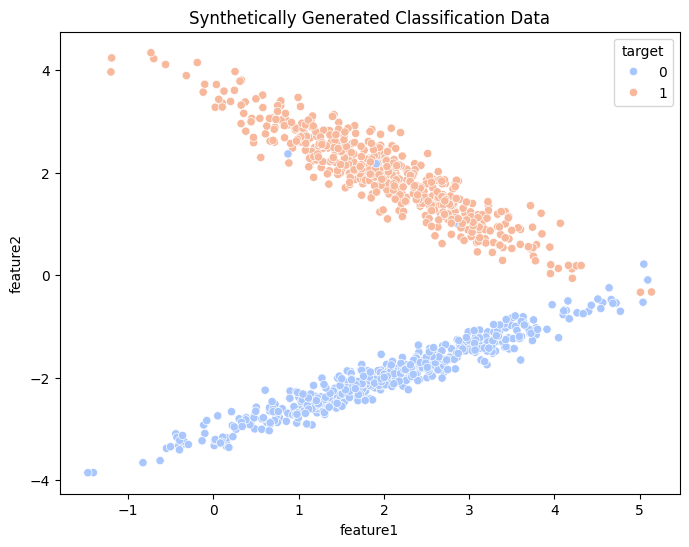

In [7]:

plt.figure(figsize=(8, 6))
sns.scatterplot( x=X['feature1'], y=X['feature2'], hue=y['target'], palette='coolwarm')
plt.title("Synthetically Generated Classification Data")
plt.show()

In [8]:
from sklearn.svm import SVC

In [9]:
svc=SVC(kernel='linear', random_state=42)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
svc.fit(X_train, y_train)

c:\Users\snrpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=42)

In [12]:
y_pred=svc.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[103   1]
 [  0  96]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       104
           1       0.99      1.00      0.99        96

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [14]:
#Increase clusters per class

X, y = make_classification (n_samples=1000, n_features=2, n_redundant=0, 
                           n_classes=2, n_clusters_per_class=2, 
                            # Sınıflar arası mesafe artırıldı
                           random_state=42)

In [15]:
X=pd.DataFrame(X, columns=['feature1', 'feature2'])
y=pd.DataFrame(y, columns=['target'])

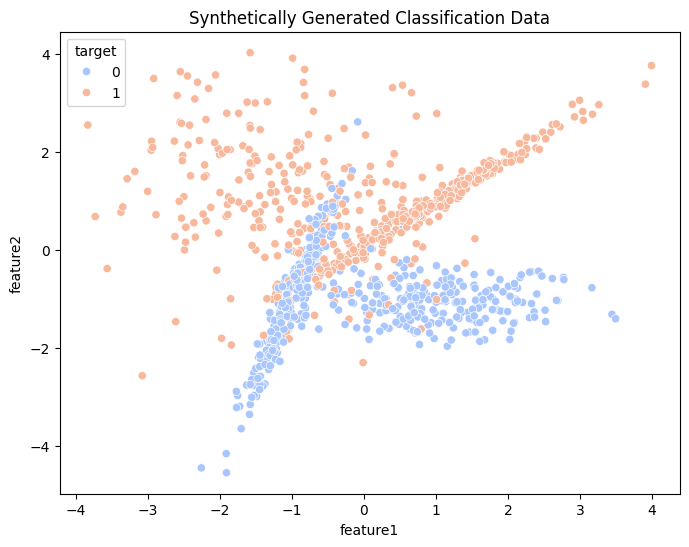

In [16]:

plt.figure(figsize=(8, 6))
sns.scatterplot( x=X['feature1'], y=X['feature2'], hue=y['target'], palette='coolwarm')
plt.title("Synthetically Generated Classification Data")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[89 12]
 [12 87]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       101
           1       0.88      0.88      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



c:\Users\snrpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}


In [20]:
gridsearch=GridSearchCV(SVC(), param_grid, refit=True, verbose=0)

In [21]:
gridsearch.fit(X_train, y_train)

c:\Users\snrpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\snrpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\snrpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\snrpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataC

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [22]:
gridsearch.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [23]:
#train model with best parameters
svc=SVC(C=10, gamma=0.1, kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[95  6]
 [14 85]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       101
           1       0.93      0.86      0.89        99

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



c:\Users\snrpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\snrpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


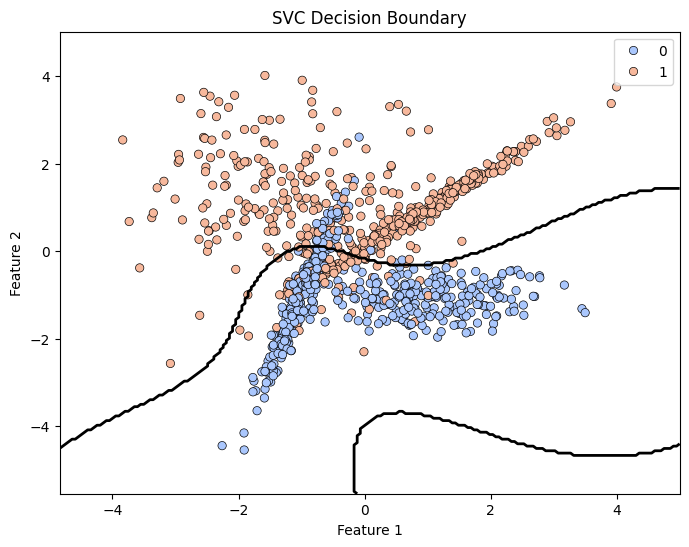

[0 1]


In [35]:
# Görselleştirme fonksiyonu
def plot_svc_decision_boundary(model, X, y):
    # Meshgrid oluştur (2D uzayda karar sınırlarını çizmek için)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    # Model tahminleri al
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Scatter plot çiz
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor='k')
    
    # Karar sınırlarını ekle
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    plt.title("SVC Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
    print(np.unique(Z))  # Kaç farklı sınıf tahmini var kontrol et

 # y'yi de dönüştürebilirsin

plot_svc_decision_boundary(svc, X, y)



In [30]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
y = y.ravel()  # veya y.flatten()  # 1D'ye çevir



X shape: (1000, 2)
y shape: (1000,)
